In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [2060]:
# [np.random.normal(0, 1, 50) for _ in range(10)]

In [17]:
import numpy as np
import theano
import theano.tensor as T

def Sigmoid(x):
    y = T.nnet.sigmoid(x)
    return(y)

def ReLU(x):
    y = T.maximum(0.0, x)
    return(y)

class HiddenLayer(object):
    def __init__(self, rng, input, n_in, n_out, activation, W=None, b=None):
        self.input = input
        self.activation = activation

        if W is None:
            W_values = np.asarray(0.01 * rng.standard_normal(size=(n_in, n_out)), dtype=theano.config.floatX)
            W = theano.shared(value=W_values, name='W')
        if b is None:
            b_values = np.zeros((n_out,), dtype=theano.config.floatX)
            b = theano.shared(value=b_values, name='b')
        self.W = W
        self.b = b

        self.output = self.activation( T.dot(self.input, self.W) + self.b )
    
        # parameters of the model
        self.params = [self.W, self.b]

class Decoder(object):
    def __init__(self, rng, input, latent_size, out_size, activation, W_z = None, b = None):
        self.input = input
        self.activation = activation

        # setup the params                                                                                                                          
        if W_z is None:
            W_values = np.asarray(0.01 * rng.standard_normal(size=(latent_size, out_size)), dtype=theano.config.floatX)
            W_z = theano.shared(value=W_values, name='W_hid_z')
        if b is None:
            b_values = np.zeros((out_size,), dtype=theano.config.floatX)
            b = theano.shared(value=b_values, name='b')
        self.W_z = W_z
        self.b = b
        
        self.pre_act_out = T.dot(self.input, self.W_z) + self.b
        self.output = self.activation(self.pre_act_out)
        
        # gather parameters
        self.params = [self.W_z, self.b]

In [1856]:
def Stick_Breaking(num_weights, alpha):
    betas = rng.beta(1, alpha, size=num_weights)
    betas[1:] *= np.cumprod(1 - betas[:-1])
    return betas

In [1077]:
np.asarray(0.01 * rng.standard_normal(size=(50, 728))).shape

(50, 728)

In [1078]:
rng = np.random.RandomState(1234)

In [1079]:
x = T.matrix('x')

In [2071]:
hidden = HiddenLayer(rng, x, 500, 784, Sigmoid, W=data[6], b=data[7])

In [2072]:
decoder = Decoder(rng, x, 50, 500, ReLU, W_z=data[4], b=data[5])

In [2073]:
hidden_generator = theano.function(
    inputs = [hidden.input],
    outputs = hidden.output
)

In [2074]:
generator = theano.function(
    inputs = [decoder.input],
    outputs = decoder.output
)

In [2075]:
base = Stick_Breaking(50, 5).reshape(1, 50)

In [2076]:
np.random.dirichlet((1), 50)

TypeError: object of type 'int' has no len()

In [1930]:
! pip install Pillow

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 2.1MB 484kB/s eta 0:00:01


In [1931]:
from PIL import Image

In [2078]:
# temp = base
# temp[0, 0] = Stick_Breaking(1, 5)
for i in range(100):
    mask = np.zeros((1, 50))
    mask[0, 6] = Stick_Breaking(1, 5)
    out_hiddent = generator(mask.reshape(1, 50))
    out = hidden_generator(out_hiddent)
    img = np.array(out.reshape((28, 28))*255, dtype='uint8')
    Image.fromarray(img).save('7a/test_'+str(i)+'.jpg')

In [1997]:
sample = np.random.beta(1, 5, 50)

In [1920]:
sample

array([0.24287146, 0.0904724 , 0.26950602, 0.12283128, 0.04301511,
       0.09508969, 0.07314202, 0.1173545 , 0.0028075 , 0.01748094,
       0.00069062, 0.06170072, 0.17782377, 0.03817044, 0.06715078,
       0.2378916 , 0.07323847, 0.26819312, 0.17177781, 0.21365267,
       0.18751764, 0.05868015, 0.35152724, 0.04885926, 0.52841814,
       0.21826668, 0.08034665, 0.01794059, 0.08020282, 0.02579817,
       0.07033361, 0.34919117, 0.05833092, 0.15388604, 0.47096196,
       0.09863467, 0.10668535, 0.2253993 , 0.24198804, 0.13424747,
       0.00540187, 0.08990744, 0.08685188, 0.53093671, 0.01900725,
       0.08336352, 0.03918843, 0.20712319, 0.38151671, 0.18159774])

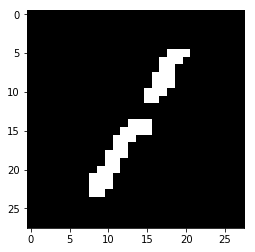

In [1926]:
# out_hiddent = hidden_generator(np.random.normal(0, 1, 50).reshape(1, 50))
# out_hiddent = hidden_generator(sample[:, 1].reshape(1, 50))
out_hiddent = generator(sample.reshape(1, 50))
out = hidden_generator(out_hiddent)
img = np.array(out.reshape((28, 28)), dtype='uint8')
plt.imshow(img, cmap='gray')

In [2067]:
import pickle

In [1785]:
params = open('/home/bilal/workspace/UmeshSejwani/stickBreaking_vae_params_.pkl', 'rb')

In [2054]:
params = open('/home/bilal/workspace/UmeshSejwani/variable_autoencoder/experiments/gauss_vae_params_.pkl', 'rb')

In [2068]:
params = open('/home/bilal/workspace/UmeshSejwani/orig/stickBreaking_vae_params_.pkl', 'rb')

In [2069]:
data = pickle.load(params)

In [77]:
len(data)

8

In [7]:
data[0].shape

(784, 500)

In [8]:
data[1].shape

(500,)

In [9]:
data[2].shape

(500, 49)

In [10]:
data[3].shape

(500, 49)

In [12]:
data[4].shape

(50, 500)

In [13]:
data[5].shape

(500,)

In [14]:
data[6].shape

(500, 784)

In [15]:
data[7].shape

(784,)

In [16]:
len(data)

8